<a href="https://colab.research.google.com/github/paulf35/winequality/blob/main/CD_P2_SpanishWines_EDA_CORE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Predict the quality of Spanish wines based on existing data
Data Source: https://www.kaggle.com/datasets/fedesoriano/spanish-wine-quality-dataset

## Overview:
TBD - Fill in later

# Add imports and functions

## Imports

In [31]:
# Imports
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Warnings
import warnings

## Set filter warnings to ignore
warnings.filterwarnings('ignore')

## Functions

In [32]:
# Explore Univariate Categorical Function
def explore_categorical(df, x, fillna = True, placeholder = 'MISSING',
                        figsize = (10,6), order = None):
  """Creates a seaborn countplot with the option to temporarily fill missing values
  Prints statements about null values, cardinality, and checks for
  constant/quasi-constant features.
  Source:{PASTE IN FINAL LESSON LINK}
  """
  # Make a copy of the dataframe and fillna
  temp_df = df.copy()
  # Before filling nulls, save null value counts and percent for printing
  null_count = temp_df[x].isna().sum()
  null_perc = null_count/len(temp_df)* 100
  # fillna with placeholder
  if fillna == True:
    temp_df[x] = temp_df[x].fillna(placeholder)
  # Create figure with desired figsize
  fig, ax = plt.subplots(figsize=figsize)
  # Plotting a count plot
  sns.countplot(data=temp_df, x=x, ax=ax, order=order)
  # Rotate Tick Labels for long names
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
  # Add a title with the feature name included
  ax.set_title(f"Column: {x}", fontweight='bold')

  # Fix layout and show plot (before print statements)
  fig.tight_layout()
  plt.show()

  # Print null value info
  print(f"- NaN's Found: {null_count} ({round(null_perc,2)}%)")
  # Print cardinality info
  nunique = temp_df[x].nunique()
  print(f"- Unique Values: {nunique}")

  # First find value counts of feature
  val_counts = temp_df[x].value_counts(dropna=False)
  # Define the most common value
  most_common_val = val_counts.index[0]
  # Define the frequency of the most common value
  freq = val_counts.values[0]
  # Calculate the percentage of the most common value
  perc_most_common = freq / len(temp_df) * 100

  # Print the results
  print(f"- Most common value: '{most_common_val}' occurs {freq} times ({round(perc_most_common,2)}%)")
  # print message if quasi-constant or constant (most common val more than 98% of data)
  if perc_most_common > 98:
    print(f"\n- [!] Warning: '{x}' is a constant or quasi-constant feature and should be dropped.")
  else:
    print("- Not constant or quasi-constant.")
  return fig, ax

# Explore Univariate Numerical Function
def explore_numeric(df, x, figsize=(6,5) ):
  """Creates a seaborn histplot and boxplot with a share x-axis,
  Prints statements about null values, cardinality, and checks for
  constant/quasi-constant features.
  Source:{PASTE IN FINAL LESSON LINK}
  """

  ## Save null value counts and percent for printing
  null_count = df[x].isna().sum()
  null_perc = null_count/len(df)* 100


  ## Making our figure with gridspec for subplots
  gridspec = {'height_ratios':[0.7,0.3]}
  fig, axes = plt.subplots(nrows=2, figsize=figsize,
                           sharex=True, gridspec_kw=gridspec)
  # Histogram on Top
  sns.histplot(data=df, x=x, ax=axes[0])

  # Boxplot on Bottom
  sns.boxplot(data=df, x=x, ax=axes[1])

  ## Adding a title
  axes[0].set_title(f"Column: {x}", fontweight='bold')

  ## Adjusting subplots to best fill Figure
  fig.tight_layout()

  # Ensure plot is shown before message
  plt.show()


  # Print null value info
  print(f"- NaN's Found: {null_count} ({round(null_perc,2)}%)")
  # Print cardinality info
  nunique = df[x].nunique()
  print(f"- Unique Values: {nunique}")


  # Get the most most common value, its count as # and as %
  most_common_val_count = df[x].value_counts(dropna=False).head(1)
  most_common_val = most_common_val_count.index[0]
  freq = most_common_val_count.values[0]
  perc_most_common = freq / len(df) * 100

  print(f"- Most common value: '{most_common_val}' occurs {freq} times ({round(perc_most_common,2)}%)")

  # print message if quasi-constant or constant (most common val more than 98% of data)
  if perc_most_common > 98:
    print(f"\n- [!] Warning: '{x}' is a constant or quasi-constant feature and should be dropped.")
  else:
    print("- Not constant or quasi-constant.")
  return fig, axes

# Load data and mount Google Drive

In [33]:
# Mount google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [34]:
# Load data in from Google Drive
fname = "/content/drive/MyDrive/CodingDojo/02-MachineLearning/Week07/Data/wines_SPA.csv"
df = pd.read_csv(fname)

# Load first 5 rows
df.head()

,winery,wine,year,rating,num_reviews,country,region,price,type,body,acidity
0,Teso La Monja,Tinto,2013,4.9,58,Espana,Toro,995.00,Toro Red,5.0,3.0
1,Artadi,Vina El Pison,2018,4.9,31,Espana,Vino de Espana,313.50,Tempranillo,4.0,2.0
2,Vega Sicilia,Unico,2009,4.8,1793,Espana,Ribera del Duero,324.95,Ribera Del Duero Red,5.0,3.0
3,Vega Sicilia,Unico,1999,4.8,1705,Espana,Ribera del Duero,692.96,Ribera Del Duero Red,5.0,3.0
4,Vega Sicilia,Unico,1996,4.8,1309,Espana,Ribera del Duero,778.06,Ribera Del Duero Red,5.0,3.0


# Data Exploration

In [35]:
# Check types
df.dtypes

winery          object
wine            object
year            object
rating         float64
num_reviews      int64
country         object
region          object
price          float64
type            object
body           float64
acidity        float64
dtype: object

In [36]:
# Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7500 entries, 0 to 7499
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   winery       7500 non-null   object 
 1   wine         7500 non-null   object 
 2   year         7498 non-null   object 
 3   rating       7500 non-null   float64
 4   num_reviews  7500 non-null   int64  
 5   country      7500 non-null   object 
 6   region       7500 non-null   object 
 7   price        7500 non-null   float64
 8   type         6955 non-null   object 
 9   body         6331 non-null   float64
 10  acidity      6331 non-null   float64
dtypes: float64(4), int64(1), object(6)
memory usage: 644.7+ KB


There are missing vlaues for type, body, acidity, and year. We'll need to impute those before building the models.

In [37]:
# Shape
print(f'There are {df.shape[0]} rows and {df.shape[1]} columns.')

There are 7500 rows and 11 columns.


In [38]:
# Describe
df.describe(exclude='number')

,winery,wine,year,country,region,type
count,7500,7500,7498,7500,7500,6955
unique,480,847,71,1,76,21
top,Contino,Reserva,2011,Espana,Rioja,Rioja Red
freq,457,467,1190,7500,2440,2357


Notes:
- No major outliers, but winery and wine are very high cardinality.

In [39]:
df.describe(include='number')

,rating,num_reviews,price,body,acidity
count,7500.000000,7500.000000,7500.000000,6331.000000,6331.000000
mean,4.254933,451.109067,60.095822,4.158427,2.946612
std,0.118029,723.001856,150.356676,0.583352,0.248202
min,4.200000,25.000000,4.990000,2.000000,1.000000
25%,4.200000,389.000000,18.900000,4.000000,3.000000
50%,4.200000,404.000000,28.530000,4.000000,3.000000
75%,4.200000,415.000000,51.350000,5.000000,3.000000
max,4.900000,32624.000000,3119.080000,5.000000,3.000000


In [ ]:
# Check object columns for inconsistent data

# Create a series of the datatypes
d_types = df.dtypes
# Create a filter to select only the object datatypes
object_d_types = d_types[(d_types == "object")]
# Display the series of object datatypes
object_d_types

# display unique values from each column
for column in object_d_types.index:
  print(column)
  print(df[column].unique())
  print('\n')

In [ ]:
# Check number columns for inconsistent data

# Create a series of the datatypes
d_types = df.dtypes
# Create a filter to select only the object datatypes
num_d_types = d_types[(d_types != "object")]
# Display the series of object datatypes
num_d_types

# display unique values from each column
for column in num_d_types.index:
  print(column)
  print(df[column].unique())
  print('\n')

In [42]:
## Display the number of duplicate rows in the dataset
print(f'There are {df.duplicated().sum()} duplicate rows.')

There are 5452 duplicate rows.


## Summary of Cleanup Needed
- Remove all duplicate rows
- Remove `winery` and `wine` columns because of high cardinality in data.  
- Address N.V. value in Year feature
- Remove country because they are all labeled as `Espana'

**Note**: I'm going to remove remove rows in numeric columns where the data is missing or is inconsistent with other values. Many of the current feature types are incorrect, which will have an impact on the modeling. This will allow me to convert data types before we build models, and we'll have a significant amount of data to build the models after we remove rows.


# Data Cleanup

## Remove duplicate rows

In [43]:
# Remove duplicate rows
df = df.drop_duplicates()

## Confirm duplicate rows have been dropped
print(f'There are {df.duplicated().sum()} duplicate rows.')


There are 0 duplicate rows.


Clean up inconsistent 'year' values

In [44]:
#Remove N.V. rows from year
df = df[df.year != 'N.V.']



## Drop columns

In [45]:
# Remove county column
df.drop(columns=['country','winery', 'wine'], inplace=True)

## Verify changes

In [46]:
#Verify changes
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1978 entries, 0 to 6100
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   year         1976 non-null   object 
 1   rating       1978 non-null   float64
 2   num_reviews  1978 non-null   int64  
 3   region       1978 non-null   object 
 4   price        1978 non-null   float64
 5   type         1879 non-null   object 
 6   body         1716 non-null   float64
 7   acidity      1716 non-null   float64
dtypes: float64(4), int64(1), object(3)
memory usage: 139.1+ KB


# EDA Univariate Visualizations


## Object Columns

### region

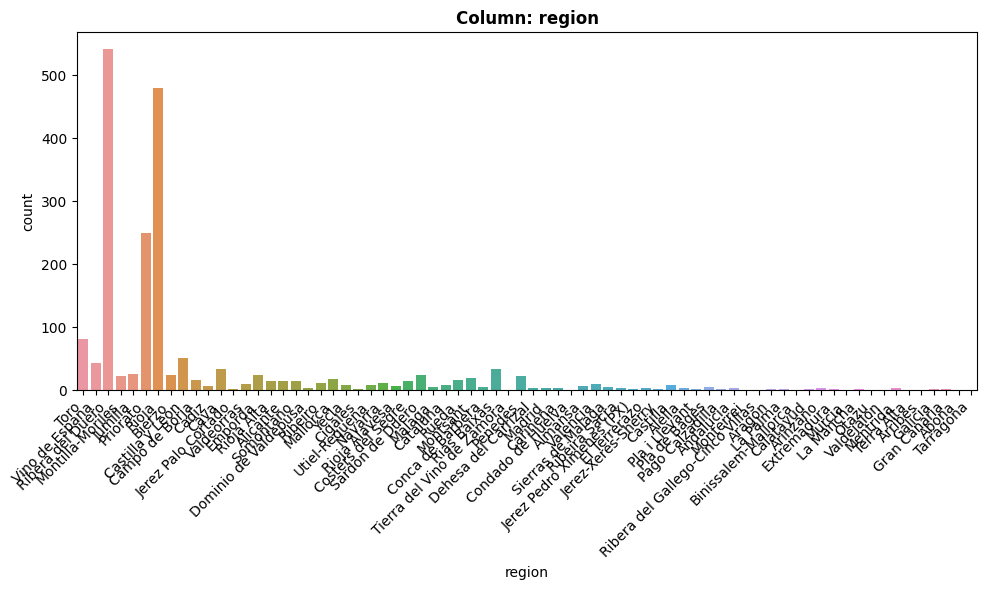

- NaN's Found: 0 (0.0%)
- Unique Values: 72
- Most common value: 'Ribera del Duero' occurs 541 times (27.35%)
- Not constant or quasi-constant.


In [47]:
# Univariate EDA for 'region'
explore_categorical(df, 'region');

Notes:
- High cardinality, but will have an influence on the target price.
- `Ribera del Duero` is the most common value.

### type

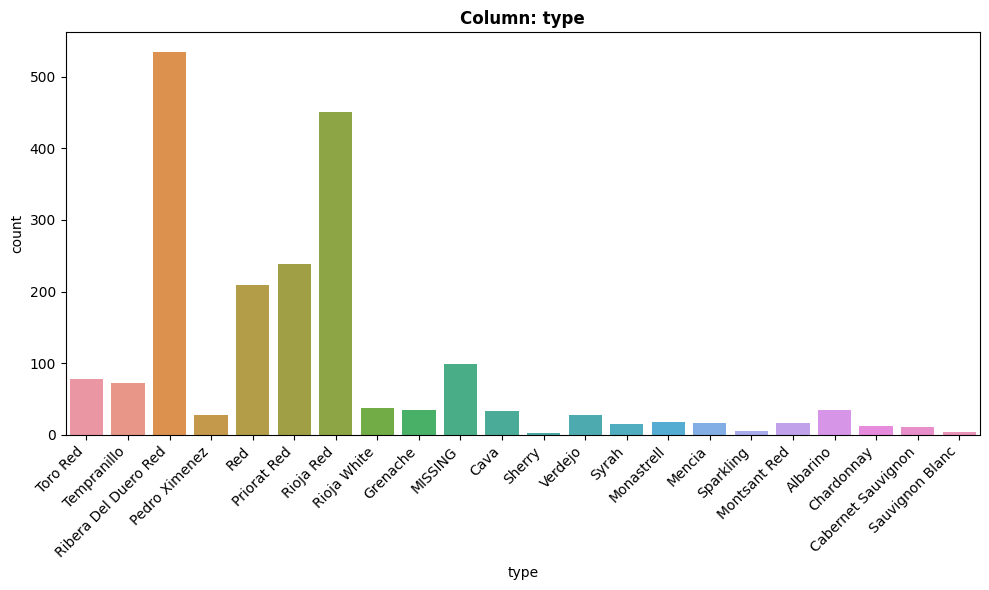

- NaN's Found: 99 (5.01%)
- Unique Values: 22
- Most common value: 'Ribera Del Duero Red' occurs 535 times (27.05%)
- Not constant or quasi-constant.


In [48]:
# Univariate EDA for 'type'
explore_categorical(df, 'type');

### year

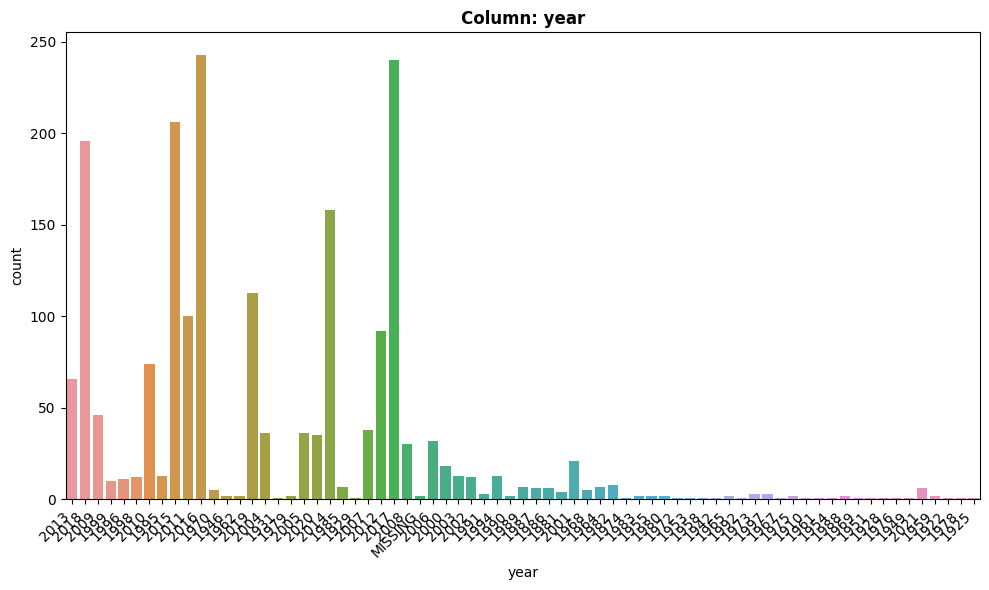

- NaN's Found: 2 (0.1%)
- Unique Values: 71
- Most common value: '2016' occurs 243 times (12.29%)
- Not constant or quasi-constant.


In [49]:
# Univariate model for 'Year'
explore_categorical(df, 'year');

Notes:
- Most common year is `2016`
- Any bottle made before `2000` appears to be an outlier.

##Numeric Columns

### price (target)

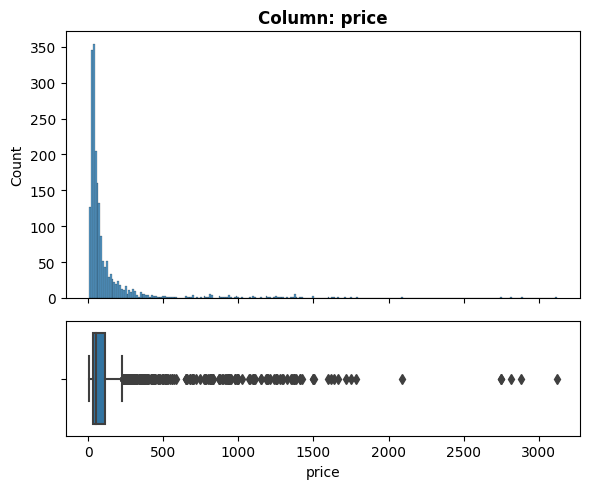

- NaN's Found: 0 (0.0%)
- Unique Values: 1258
- Most common value: '75.0' occurs 16 times (0.81%)
- Not constant or quasi-constant.


In [50]:
# Univariate model for 'price'
explore_numeric(df, 'price');

Notes:
- The most common prices is `$75.00`
- Any bottles above around `$250.00` in price are outliers.

### num_reviews

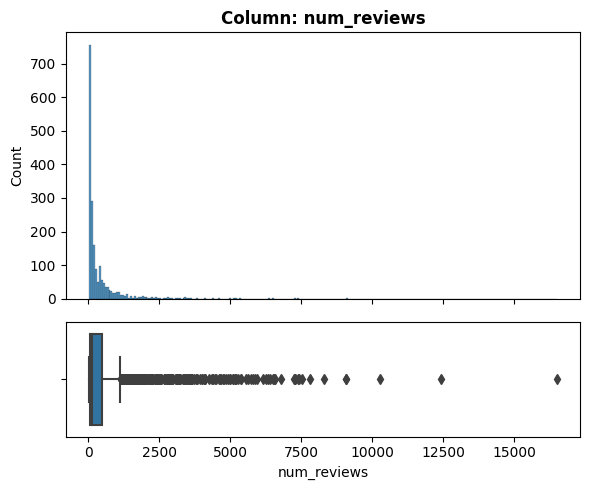

- NaN's Found: 0 (0.0%)
- Unique Values: 805
- Most common value: '28' occurs 27 times (1.37%)
- Not constant or quasi-constant.


In [51]:
# Univariate model for 'num_reviews'
explore_numeric(df, 'num_reviews');

### rating

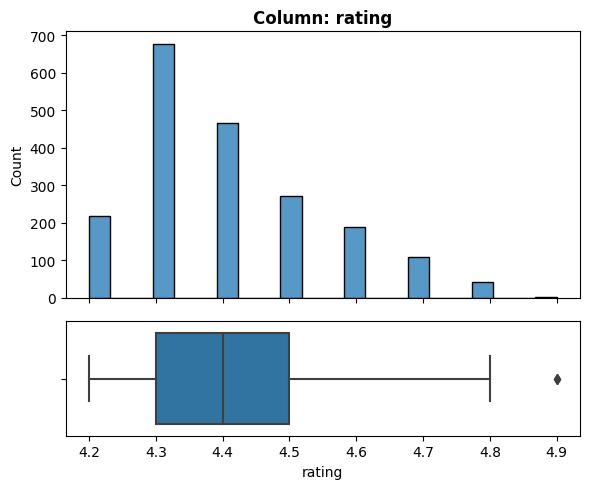

- NaN's Found: 0 (0.0%)
- Unique Values: 8
- Most common value: '4.3' occurs 677 times (34.23%)
- Not constant or quasi-constant.


In [52]:
# Univariate model for 'rating'
explore_numeric(df, 'rating');

Notes:
- Most common value is 4.3
- There appears to be one outlier of `4.9`

### body

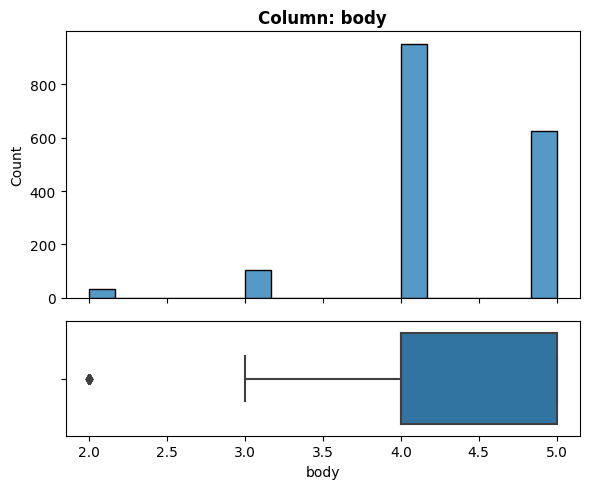

- NaN's Found: 262 (13.25%)
- Unique Values: 4
- Most common value: '4.0' occurs 950 times (48.03%)
- Not constant or quasi-constant.


In [53]:
# Univariate model for 'body'
explore_numeric(df, 'body');

Notes:
- Most common value is `4`.
- There is one outlier in the data of `2`

### acidity

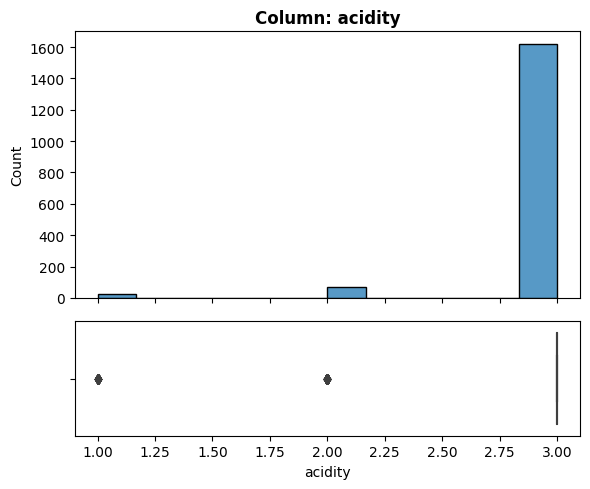

- NaN's Found: 262 (13.25%)
- Unique Values: 3
- Most common value: '3.0' occurs 1619 times (81.85%)
- Not constant or quasi-constant.


In [54]:
# Univariate model for 'acidity'
explore_numeric(df, 'acidity');

Notes:
- Most common value is `3`, but this occurs 94.4% of the time.
- There are two outlier values, 1 and 2.
- We may want to remove this as it's very close to being quasi constant.